# Soft Margin SVM

Hard Margin SVM 的缺點是可能 overfit, 因為 轉換項次太高 和 堅持所有資料都要區分開。

參考在 pocket 中的做法，最小化犯錯的數量:

$$
\min_{b,w} \sum_{n=1}^N \Big[ y_n \ne sign\big( w^T z_n + b \big) \Big]_{boolean}
$$

原來的 hard-margin SVM 問題是這樣定義:

$
\min_{b,w} \frac{1}{2} w^T w \\
s.t. \ \ y_n \big( w^T z_n + b \big) \ge 1 \text{ for all n }
$

結合 pocket 的方式，將 hard-margin SVM 修改成最小化犯錯的數量:

$
\min_{b,w} \frac{1}{2} w^T w + C \cdot \sum_{n=1}^N \Big[ y_n \ne sign\big( w^T z_n + b \big) \Big]_{boolean} \\
s.t. \ \ y_n \big( w^T z_n + b \big) \ge 1 \text{ for correct n } \\
s.t. \ \ y_n \big( w^T z_n + b \big) \ge -\infty \text{ for incorrect n }
$

C: trade-off of LARGE MARGIN and NOISE TOLERANCE.

C 越大 : 傾向不要犯錯；  
C 越小 : 傾向找到大的 margin；在對的點上要有寬的 margin。

將兩個 s.t. such that 的條件結合起來變成:

$
s.t. \ \ y_n \big( w^T z_n + b \big) \ge 1 - \infty \cdot \Big[ y_n \ne sign\big( w^T z_n + b \big) \Big]_{boolean} \\
$

表示 對的點時候一樣要在意 s.t. 條件；而錯的點時候要 大於 乘以負無限大，就和無視條件一樣。  
所以是對的點要限制 s.t. 條件；錯的點不限制 s.t. 條件。

boolean 的條件有個缺點，造成不再是 QP 問題；就用不上之前的 dual, kernel...

也無法分辨錯誤到底有多少；有時候可能錯誤很小，很接近邊界。

#### 使用錯誤衡量 margin violation : $ \xi $ - linear constraints

penalize with margin violation instead of error count - quadratic objective.

## Soft Margin SVM primal

<img src="./imgs/c204-margin-violation.png" style="float:right" />

$
\min_{b,w,\xi} \frac{1}{2} w^T w + C \cdot \sum_{n=1}^N \xi_n \\
s.t. \ \ y_n \big( w^T z_n + b \big) \ge 1 - \xi_n \text{ and } \xi_n \ge 0 \text{ for all n }
$

這樣就是一個 QP 問題:

objectives : $ w, \xi $ 的二次式 (實際上 $ \xi $ 只有一次)  
constraints : $ \xi $ 的一次式

### Lagrange Dual

將上面 primal 形式轉換成 Dual 的形式，Lagrange function with Lagrange multipliers $ \alpha_n $ and $ \beta_n $

$$
\begin{align}
\mathcal{L} \big( b, w, \xi, \alpha, \beta \big) = &
\frac{1}{2} w^T w + C \cdot \sum_{n=1}^N \xi_n \\
& + \sum_{n=1}^N \alpha_n \cdot \big( 1 - \xi_n - y_n ( w^T z_n + b) \big) +
\sum_{n=1}^N \beta_n \cdot \big( - \xi_n \big)
\end{align}
$$

獲得 Lagrange Dual 的形式，然後用 KKT condition 簡化該問題:

$$
\max_{\alpha_n \ge 0, \beta_n \ge 0} \Big( \min_{b,w,\xi} \mathcal{L} \big( b, w, \xi, \alpha, \beta \big) \Big)
$$

對 primal 裏頭每個變數的微分為 0:

$
\frac{\partial \mathcal{L}}{\partial \xi} = 0 = C - \alpha_n - \beta_n \iff \beta_n = C - \alpha_n
$

因為 $ \alpha_n \ge 0, \beta_n \ge 0 $, 所以 $ 0 \le \alpha_n \le C $

$$
\max_{0 \le \alpha_n \le C, \beta_n = C - \alpha_n} \Big( \min_{b,w,\xi} \ \ 
\frac{1}{2} w^T w
+ \sum_{n=1}^N \alpha_n \cdot \big( 1 - y_n ( w^T z_n + b) \big) \ \  \Big)
$$

inner problem same as hard-margin SVM, 條件稍有不同，加上 $ 0 \le \alpha_n \le C $

$
\frac{\partial \mathcal{L}}{\partial b} = 0 \ \ \iff \ \ \sum_{n=1}^N \alpha_n y_n = 0
$

$
\frac{\partial \mathcal{L}}{\partial w_i} = 0 \ \ \iff \ \ w = \sum_{n=1}^N \alpha_n y_n z_n
$


## Standard Soft-Margin SVM Dual

$$
\begin{align}
\min_{\alpha} & \frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} \alpha_n \alpha_m y_n y_m z_n^T z_m - \sum_{n=1}^{N} \alpha_n \\
\text{ subject to } & \sum_{n=1}^{N} y_n \alpha_n = 0 \\
& 0 \le \alpha_n \le C, \text{ for n = 1,2,...,N } \\
\text{ implicity } & w = \sum_{n=1}^{N} y_n \alpha_n z_n = 0 \\
& \beta_n = C - \alpha_n, \text{ for n = 1,2,...,N }
\end{align}
$$

與原先的 Hard-Margin SVM 差別只在：用 C 作為 alpha 值上限設定。  
是一個 (convex) QP with N variables and 2N+1 constraints.

#### Soft Margin SVM - solve b - complementary slackness

$
\alpha_n \big( 1 - \xi_n - y_n ( w^T z_n + b ) \big) = 0 \\
\big( C - \alpha_n \big) \xi_n = 0 \ \ \to \ \ \beta_n ( \xi ) = 0
$

在 SV 上 $ SV ( \alpha_s \gt 0 ) $  
$ \to b = y_s - y_s \xi_s - w^T z_s $

在 free SV 上 $ (\alpha \le C) $  
$ \to \xi_s = 0 $

所以可以利用 free $ SV(x_s, y_x) $ 來獲得 b:

$$
b = y_s - \sum_{\text{SV indices n}} \alpha_n y_n K \big( x_n, x_s \big)
$$

## Kernel Soft-Margin SVM

$ q_{n,m} = y_n y_m K(x_n, x_m) $

$ \vec{p} = -1_{N} $

(A, c) for equ. / lower-bound / upper-bound constraints.

$ \alpha \leftarrow QP(Q_D, p, A, c) $

$ b = y_s - \sum_{\text{SV indices n}} \alpha_n y_n K \big( x_n, x_s \big) $

return SVs and their $ \alpha_n $ as well as b such that for new x,

$$
g_{SVM} \big ( x \big ) = 
sign \Big( \sum_{\text{SV indices n}} \alpha_n y_n K(x_n, x) + b \Big)
$$

<img src="./imgs/c204-free-svs.png" style="float:right;width:200px;" />

#### Physical meaning of $ \alpha_n $

Complementary Slackness:  
$
\alpha_n \big( 1 - \xi_n - y_n ( w^T z_n + b ) \big) = 0 \\
\big( C - \alpha_n \big) \xi_n = 0 \ \ \to \ \ \beta_n ( \xi ) = 0
$

- 右圖方塊: free SV $ 0 \le \alpha_n \le C, \xi_n = 0 $ 剛好在邊界上，可定位 b

- 右圖圓圈叉叉: Non SV, $ \alpha_n = 0, \xi_n = 0 $ 在邊界外，正確的分類；極少數可能在邊界上

- 右方三角: Bounded SV, $ \alpha_n = C $, 在邊界內，有違反 $ \xi_n \gt 0 $ (violation amount) 

### Example of Soft-Margin SVM with Poly-2 Kernel

b:  -1.2518, using alpha[2]:0.15546


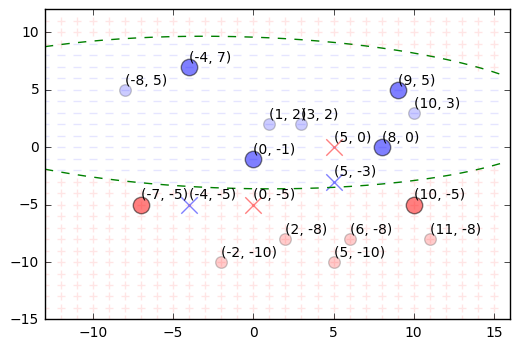

1   - (  6, -8) - alphas: 0.000000008  - g: 2.810495
2   - (  2, -8) - alphas: 0.000000009  - g: 2.762259
3   - ( 10, -5) - alphas: 0.155459967  - g: 1.000000
4   - ( -2,-10) - alphas: 0.000000004  - g: 4.578796
5   - ( -7, -5) - alphas: 0.912299877  - g: 1.000000
6   - (  0, -5) - alphas: 1.999999894  - g: 0.729267
7   - (  5,-10) - alphas: 0.000000003  - g: 4.493872
8   - ( 11, -8) - alphas: 0.000000006  - g: 3.044832
9   - (  5,  0) - alphas: 1.999999994  - g: -1.152425
10  - ( -4, -5) - alphas: 1.999999992  - g: 0.837560
11  - ( -4,  7) - alphas: 0.001301909  - g: -1.000030
12  - (  9,  5) - alphas: 0.315394115  - g: -1.000000
13  - (  3,  2) - alphas: 0.000000028  - g: -1.487660
14  - (  8,  0) - alphas: 0.041828906  - g: -1.000000
15  - (  0, -1) - alphas: 0.709234565  - g: -1.000000
16  - (  1,  2) - alphas: 0.000000027  - g: -1.529365
17  - (  5, -3) - alphas: 1.999999983  - g: -0.216871
18  - ( -8,  5) - alphas: 0.000000087  - g: -1.280989
19  - ( 10,  3) - alphas: 0.000000149

In [2]:
import pandas as pd
from pandas import DataFrame as df
from cvxopt import matrix, solvers, printing
import itertools as it
import numpy as np
import matplotlib.pyplot as plt

class SVMPoly2:
    def __init__(self, visualization=True, C=0.5):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        self.markers = {1:'+',-1:'_'}
        self.g_dense = 1
        self.C = C
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    # train
    def fit(self, data):
        x = data[['x1','x2']].values
        y = data[['y']].values
        self.NUM = x.shape[0]
        self.DIM = x.shape[1]
        self.data = data
        self.x = x
        self.y = y
        self.sol, self.K = self.solver_qp()
        self.alphas = np.array(self.sol['x'])
        self.z = np.array([self.from_x_to_z(xi) for xi in x])
        self.w = self.get_w_by_ayz(self.alphas, self.y, self.z)
        self.b = self.get_b_by_ayx(self.alphas, self.y, self.x)
        if self.visualization:
            self.draw_data(self.ax, self.x, self.y)
            self.draw_prediction_line(self.ax, self.w, self.b)
            self.draw_prediction_points(self.ax)
            plt.show();

    def solver_qp(self):
        x = self.x
        y = self.y
        K3 = self.kernel_function(x, x)
        Ky = y * y.T
        Ky = K3 * Ky
        
        C = self.C
        y = self.y
        P = matrix(Ky)
        q = matrix(-np.ones((self.NUM, 1)))
        
        h = matrix(np.append(np.zeros(self.NUM), self.C * np.ones(self.NUM)))
        tte = np.eye(self.NUM)
        tto = np.zeros((self.NUM,self.NUM))
        G = matrix(np.concatenate(( -tte, tte), axis=0))
        
        A = matrix(y.reshape(1, -1))
        b = matrix(np.zeros(1))
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        return sol, K3

    def kernel_function(self, a, b):
        K2 = np.dot(a, b.T)
        K3 = 1 + K2 + np.power(K2, 2)
        return K3
    
    def predict(self, p):
        K3 = svm.kernel_function(self.x, p)
        g_svm = np.dot(K3.reshape(1,len(self.x)), self.y * self.alphas) + self.b
        return g_svm

    def from_x_to_z(self, x):
        return [1, x[0], x[1], np.power(x[0],2), x[0]*x[1], x[0]*x[1], np.power(x[1],2)]
    
    def get_w_by_ayz(self, alphas, y, z):
        m_y = y.T
        m_ay = m_y * alphas.T
        m_ayz = m_ay.dot(z)
        m_w = m_ayz
        return m_w
    
    def get_b_by_ayx(self, alphas, y, x):
        b = 0.0
        for idx,ai in enumerate(alphas):
            if (ai <= self.C and ai > 0.000001):
                x_sv = x[idx]
                y_sv = y[idx]
                K3 = svm.kernel_function(self.x, x_sv)
                b = y_sv - np.dot(K3.reshape(1,len(self.x)), self.y * self.alphas)
                print('b: %8.4f, using alpha[%d]:%.5f' % (b, idx, ai))
                return b
        return b
        
    def get_x2_by_x1_wb(self, w, b, x1):
        p = [w[6]]
        p.append(w[2] + w[4]*x1 + w[5]*x1)
        p.append(w[0] + w[1]*x1 + w[3]*(x1*x1) + b)
        return np.roots(p)


    def draw_data(self, ax, x, y):
        self.g_maxs = np.max(x,axis=0)
        self.g_mins = np.min(x,axis=0)

        ax.set_xlim([self.g_mins[0] - 5.0, self.g_maxs[0] + 5.0])
        ax.set_ylim([self.g_mins[1] - 5.0, self.g_maxs[1] + 5.0])

        # plot labels
        for idx,d in enumerate(x):
            xi = d
            yi = y[idx]
            alphai = self.alphas[idx]
            psize,ptran = (140,0.5) if alphai >= 0.000001 else (70, 0.2)
            m = 'x' if np.abs(alphai - self.C) < 0.000001 else 'o'
            ax.scatter(xi[0], xi[1], c = self.colors[yi.item()], s=psize, alpha=ptran, marker=m)
            ax.text(xi[0], xi[1]+0.5, '(%d, %d)' % (xi[0], xi[1]))

    def draw_prediction_line(self, ax, w, b):
        ln_x1s = []
        ln_x2s_a = []
        ln_x2s_b = []
        for lx in np.arange(self.g_mins[0] - 5.0, self.g_maxs[0] + 5.0, 0.2):
            lx2s = self.get_x2_by_x1_wb(self.w[0], b, lx)
            ln_x1s.append(lx)
            ln_x2s_a.append(lx2s[0])
            ln_x2s_b.append(lx2s[1])

        ax.plot(np.real(ln_x1s), np.real(ln_x2s_a), '--g')
        ax.plot(np.real(ln_x1s), np.real(ln_x2s_b), '--g')


    def draw_prediction_points(self, ax):
        g_dense = self.g_dense
        g_x1s = np.arange(self.g_mins[0] - 5.0, self.g_maxs[0] + 5.0, g_dense)
        g_x2s = np.arange(self.g_mins[1] - 5.0, self.g_maxs[1] + 5.0, g_dense)
        g_xs = np.array(list(it.product(g_x1s,g_x2s)))
        g_ys = []
        for g_xi in g_xs:
            g_svm = svm.predict(g_xi)
            g_ys.append(1 if g_svm > 0 else -1)
            
        g_ys = np.array(g_ys).reshape(len(g_xs),1)
        g_xys = np.concatenate((g_xs, g_ys), axis=1)
        for xyi in g_xys:
            ax.scatter(xyi[0], xyi[1], c = self.colors[xyi[2]], marker=self.markers[xyi[2]], s=30, alpha=0.1)

    def print_model(self):
        for idx,ai in enumerate(self.alphas):
            g = self.predict(self.x[idx])
            print('%-3d - (%3d,%3d) - alphas: %.9f  - g: %.6f' % (idx+1, self.x[idx][0], self.x[idx][1], ai, g))


printing.options['dformat'] = '%.2f'
pd.options.display.float_format = '{:,.6f}'.format
data = pd.DataFrame(columns = ['y', 'x1', 'x2'],
                  dtype=float,
                  data=[[ 1, 6, -8],
                        [ 1, 2, -8],
                        [ 1,10, -5],
                        [ 1,-2,-10],
                        [ 1,-7, -5],
                        [ 1, 0, -5],
                        [ 1, 5,-10],
                        [ 1,11, -8],
                        [ 1, 5,  0],
                        [-1,-4, -5],
                        [-1,-4,  7],
                        [-1, 9,  5],
                        [-1, 3,  2],
                        [-1, 8,  0],
                        [-1, 0, -1],
                        [-1, 1,  2],
                        [-1, 5, -3],
                        [-1,-8,  5],
                        [-1,10,  3]])


#data = pd.DataFrame(columns = ['y', 'x1', 'x2'],
#                  dtype=float,
#                  data=[[-1, 1, 1],
#                        [ 1, 1, 2],
#                        [ 1, 1,-4],
#                        [ 1, 1, 4],
#                        [-1, 1, 3]])
#    
svm = SVMPoly2(visualization=True, C=2.0);
svm.fit(data)
svm.print_model();

### Example of Soft-Margin SVM with kernel RBF

比較 C, $ \gamma $

b:   0.8237, using alpha[0]:1.00000
b:  -0.2357, using alpha[0]:8.55906
b:  -0.4741, using alpha[0]:14.22468
b:   0.3646, using alpha[0]:1.00000
b:  -0.3836, using alpha[0]:0.52595
b:  -0.3836, using alpha[0]:0.52594


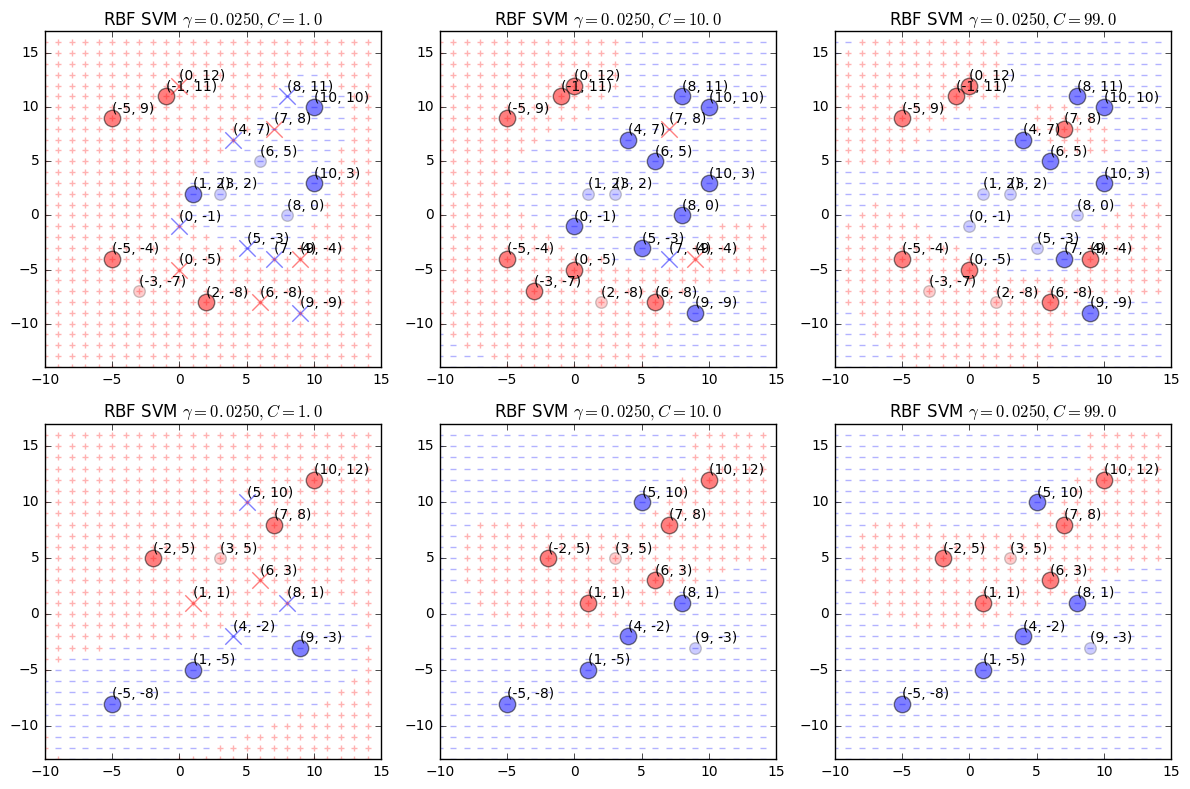

In [4]:
import pandas as pd
from pandas import DataFrame as df
from cvxopt import matrix, solvers, printing
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

class SVMPoly2:
    def __init__(self, title='', gamma=1.0, g_dense=1.0, C=0.5, ax = None):
        self.title = title
        self.gamma = gamma
        self.colors = {1:'r',-1:'b'}
        self.markers = {1:'+',-1:'_'}
        self.g_dense = g_dense
        self.ax = ax
        self.C = C

    # train
    def fit(self, data):
        x = data[['x1','x2']].values
        y = data[['y']].values
        self.NUM = x.shape[0]
        self.DIM = x.shape[1]
        self.data = data
        self.x = x
        self.y = y
        self.sol, self.K = self.solver_qp()
        self.alphas = np.array(self.sol['x'])
        self.b = self.get_b_by_ayx(self.alphas, self.y, self.x)
        
        if self.ax is not None:
            self.ax.set_title(self.title)
            self.draw_data(self.ax, self.x, self.y)
            self.draw_prediction_points(self.ax)

    def solver_qp(self):
        x = self.x
        y = self.y
        K3 = self.kernel_function(a=x)
        Ky = y * y.T
        Ky = K3 * Ky
        
        y = self.y
        P = matrix(Ky)
        q = matrix(-np.ones((self.NUM, 1)))
        
        h = matrix(np.append(np.zeros(self.NUM), self.C * np.ones(self.NUM)))
        tte = np.eye(self.NUM)
        tto = np.zeros((self.NUM,self.NUM))
        G = matrix(np.concatenate(( -tte, tte), axis=0))
        
        A = matrix(y.reshape(1, -1))
        b = matrix(np.zeros(1))
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        return sol, K3

    def kernel_function(self, a, b = None):
        if b is None:
            pairwise_sq_dists = squareform(pdist(a, 'sqeuclidean'))
            K = np.exp(-self.gamma * pairwise_sq_dists)
            return K
        else:
            p = b
            x = a
            c = x - p
            # norm^2
            n2 = np.sum(c * c, axis = 1)
            n2g = n2 * self.gamma
            Kone = np.exp(-n2g)
            return Kone
    
    def predict(self, p):
        K3 = self.kernel_function(self.x, p)
        g_svm = np.dot(K3.reshape(1,len(self.x)), self.y * self.alphas) + self.b
        return g_svm

    def get_w_by_ayz(self, alphas, y, z):
        m_y = y.T
        m_ay = m_y * alphas.T
        m_ayz = m_ay.dot(z)
        m_w = m_ayz
        return m_w
    
    def get_b_by_ayx(self, alphas, y, x):
        b = 0.0
        for idx,ai in enumerate(alphas):
            if (ai <= self.C and ai > 0.000001):
                x_sv = x[idx]
                y_sv = y[idx]
                K3 = self.kernel_function(self.x, x_sv)
                b = y_sv - np.dot(K3.reshape(1,len(self.x)), self.y * self.alphas)
                print('b: %8.4f, using alpha[%d]:%.5f' % (b, idx, ai))
                return b
        return b

    def draw_data(self, ax, x, y):
        self.g_maxs = np.max(x,axis=0)
        self.g_mins = np.min(x,axis=0)

        ax.set_xlim([self.g_mins[0] - 5.0, self.g_maxs[0] + 5.0])
        ax.set_ylim([self.g_mins[1] - 5.0, self.g_maxs[1] + 5.0])

        # plot labels
        for idx,d in enumerate(x):
            xi = d
            yi = y[idx]
            alphai = self.alphas[idx]
            m = 'x' if np.abs(alphai - self.C) < 0.000001 else 'o'
            psize,ptran = (140,0.5) if alphai >= 0.000001 else (70, 0.2)
            ax.scatter(xi[0], xi[1], c = self.colors[yi.item()], s=psize, marker=m, alpha=ptran)
            ax.text(xi[0], xi[1]+0.5, '(%d, %d)' % (xi[0], xi[1]))

    def draw_prediction_points(self, ax):
        g_dense = self.g_dense
        g_x1s = np.arange(self.g_mins[0] - 5.0, self.g_maxs[0] + 5.0, g_dense)
        g_x2s = np.arange(self.g_mins[1] - 5.0, self.g_maxs[1] + 5.0, g_dense)
        g_xs = np.array(list(it.product(g_x1s,g_x2s)))
        g_ys = []
        for g_xi in g_xs:
            g_svm = self.predict(g_xi)
            g_ys.append(1 if g_svm > 0 else -1)
            
        g_ys = np.array(g_ys).reshape(len(g_xs),1)
        g_xys = np.concatenate((g_xs, g_ys), axis=1)
        for xyi in g_xys:
            ax.scatter(xyi[0], xyi[1], c = self.colors[xyi[2]], marker=self.markers[xyi[2]], s=20, alpha=0.3)

    def print_model(self):
        for idx,ai in enumerate(self.alphas):
            g = self.predict(self.x[idx])
            print('%-3d - (%3d,%3d) - alphas: %.9f  - g: %.6f' % (idx+1, self.x[idx][0], self.x[idx][1], ai, g))
#            print('%-3d - (%3d,%3d) - alphas: %.6f' % (idx+1, self.x[idx][0], self.x[idx][1], ai))

pd.options.display.float_format = '{:,.6f}'.format
data1 = pd.DataFrame(columns = ['y', 'x1', 'x2'],
                  dtype=float,
                  data=[[ 1, 6, -8],
                        [ 1, 7,  8],
                        [ 1, 9, -4],
                        [ 1, 2, -8],
                        [ 1, 0, 12],
                        [ 1, 0, -5],
                        [ 1,-3, -7],
                        [ 1,-5,  9],
                        [ 1,-5, -4],
                        [ 1,-1, 11],
                        [-1, 6,  5],
                        [-1, 4,  7],
                        [-1, 3,  2],
                        [-1, 5, -3],
                        [-1, 7, -4],
                        [-1, 8,  0],
                        [-1, 8, 11],
                        [-1, 0, -1],
                        [-1, 1,  2],
                        [-1,10,  3],
                        [-1,10, 10],
                        [-1, 9, -9]])


data2 = pd.DataFrame(columns = ['y', 'x1', 'x2'],
                  dtype=float,
                  data=[[ 1, 1,  1],
                        [ 1,-2,  5],
                        [ 1, 3,  5],
                        [ 1, 6,  3],
                        [ 1, 7,  8],
                        [ 1,10, 12],
                        [-1,-5, -8],
                        [-1, 5, 10],
                        [-1, 1, -5],
                        [-1, 4, -2],
                        [-1, 8,  1],
                        [-1, 9, -3]])

data_s = pd.DataFrame(columns = ['y', 'x1', 'x2'],
                  dtype=float,
                  data=[[ 1, 1, 1],
                        [ 1, 1, 2],
                        [-1, 1, 3]])    

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

svm_conf = [{ 'gamma': 0.025, 'data':data1, 'C':  1 },
            { 'gamma': 0.025, 'data':data1, 'C': 10 },
            { 'gamma': 0.025, 'data':data1, 'C': 99 },
            { 'gamma': 0.025, 'data':data2, 'C':  1 },
            { 'gamma': 0.025, 'data':data2, 'C': 10 },
            { 'gamma': 0.025, 'data':data2, 'C': 99 }]

axes = axes.reshape(6,)

svms = []
for idx,i in enumerate(svm_conf):
    ax = axes[idx]
    title = 'RBF SVM $ \gamma=%.4f, C=%.1f $' % (i['gamma'], i['C'])
    svm = SVMPoly2(title=title, g_dense=1.0, gamma=i['gamma'], ax=ax, C=i['C'])
    svm.fit(i['data'])
    # svm.print_model()
    svms.append(svm)

plt.tight_layout()
plt.show()

### Model Selection

在 Soft Margin Gaussian Kernel 中，有兩個參數 $ C, \gamma $ 可以選擇。

利用 **Cross Validation** 來選擇好的 model.

### Leave-One-Out CV Error for SVM

recall: $ E_{LOOCV} = E_{CV} $ with N folds.

claim: $ E_{LOOCV} \le \frac{\#SV}{N} $

因為: non SV 的 $ e_{\text{non SV}} = 0, e_{SV} \le 1 $, 所以所有 N 相加後，可得上式。

所以 number of SVs 和 error 是有關係的，也可以用 # of SVs 來選擇好的 model.

- 可以用 # of SVs 來選擇好的 model (SV數量少的好)
- 只是 $ e_{LOOCV} $ 的 upper bound, 所以不可完全依賴；通常用來排除危險的 model (SV 太大)
- 在計算 $ e_{CV} $ 太麻煩時候，可以做為替代方案。
